  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------------------- ---

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omuili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omuili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


GPU Available: []
Training data shape: (7613, 5)
Test data shape: (3263, 4)

Training data sample:

Missing values in training data:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Missing values in test data:
id             0
keyword       26
location    1105
text           0
dtype: int64

Class distribution in training data:
target
0    4342
1    3271
Name: count, dtype: int64
target
0    57.03%
1    42.97%
Name: proportion, dtype: object


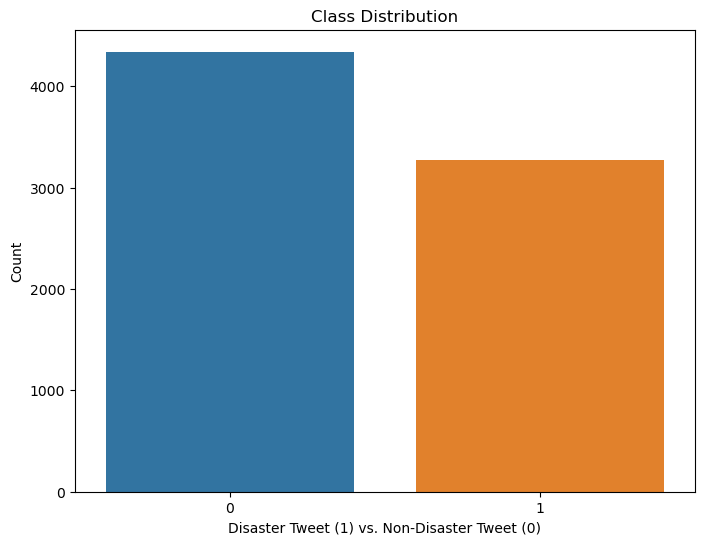


Examples of disaster tweets:
['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

Examples of non-disaster tweets:
["What's up man?" 'I love fruits' 'Summer is lovely' 'My car is so fast'
 'What a goooooooaaaaaal!!!!!!']


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


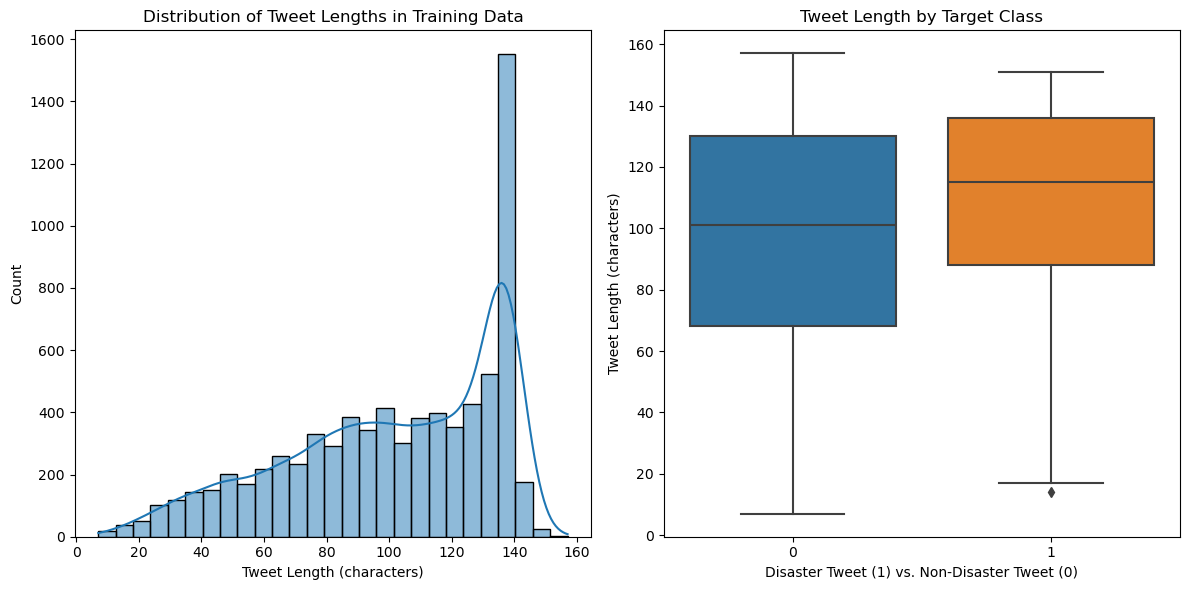

C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


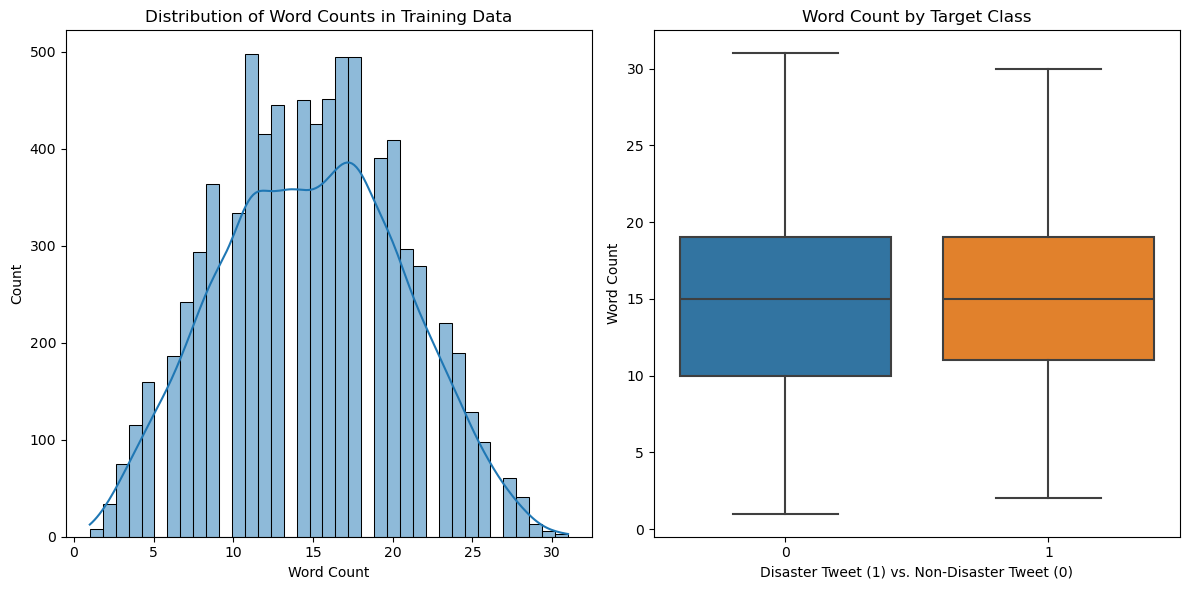


Keyword frequency in training data:
keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64

Location frequency in training data:
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64

Percentage of missing values in 'keyword': 0.8012610009194797 %
Percentage of missing values in 'location': 33.27203467752528 %


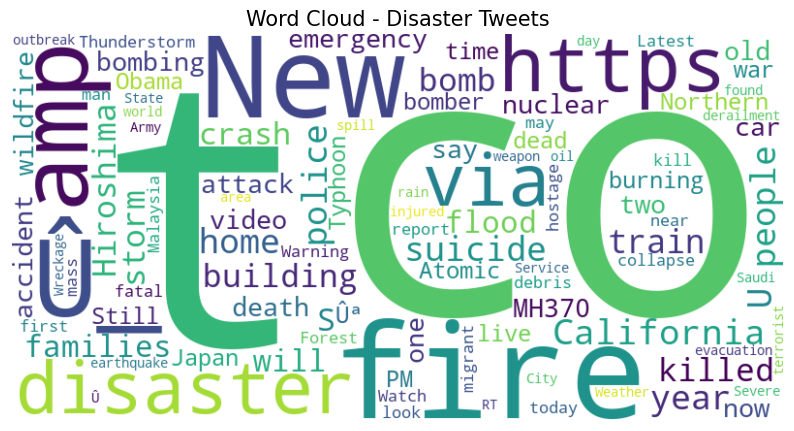

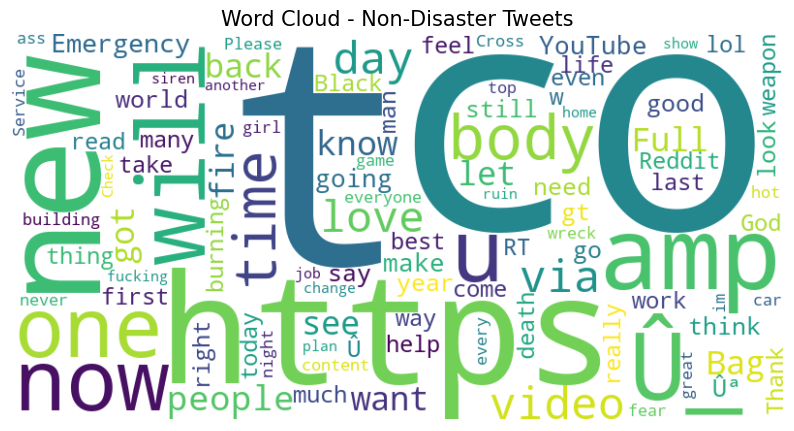

In [2]:

# Install necessary packages
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow nltk wordcloud gensim

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if TensorFlow is using GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))# Load the training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display basic information about the datasets
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Display the first few rows of the training data
print("\nTraining data sample:")
train_df.head()

# Check for missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Check the class distribution (target variable)
print("\nClass distribution in training data:")
print(train_df['target'].value_counts())
print(train_df['target'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

# Visualization of class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution')
plt.xlabel('Disaster Tweet (1) vs. Non-Disaster Tweet (0)')
plt.ylabel('Count')
plt.show()

# Display some examples of disaster and non-disaster tweets
print("\nExamples of disaster tweets:")
print(train_df[train_df['target'] == 1]['text'].head().values)

print("\nExamples of non-disaster tweets:")
print(train_df[train_df['target'] == 0]['text'].head().values)

# Check tweet length distribution
train_df['tweet_length'] = train_df['text'].apply(len)
test_df['tweet_length'] = test_df['text'].apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='tweet_length', data=train_df)
plt.title('Tweet Length by Target Class')
plt.xlabel('Disaster Tweet (1) vs. Non-Disaster Tweet (0)')
plt.ylabel('Tweet Length (characters)')

plt.tight_layout()
plt.show()

# Check word count distribution
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['word_count'], kde=True)
plt.title('Distribution of Word Counts in Training Data')
plt.xlabel('Word Count')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='word_count', data=train_df)
plt.title('Word Count by Target Class')
plt.xlabel('Disaster Tweet (1) vs. Non-Disaster Tweet (0)')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

# Examine the keyword and location columns
print("\nKeyword frequency in training data:")
print(train_df['keyword'].value_counts().head(10))

print("\nLocation frequency in training data:")
print(train_df['location'].value_counts().head(10))

# Check null values in keyword and location
print("\nPercentage of missing values in 'keyword':", 
      (train_df['keyword'].isnull().sum() / len(train_df)) * 100, "%")
print("Percentage of missing values in 'location':", 
      (train_df['location'].isnull().sum() / len(train_df)) * 100, "%")

# Generate word clouds for disaster and non-disaster tweets
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100,
                         collocations=False).generate(' '.join(data))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Generate word clouds
generate_wordcloud(train_df[train_df['target'] == 1]['text'], 'Word Cloud - Disaster Tweets')
generate_wordcloud(train_df[train_df['target'] == 0]['text'], 'Word Cloud - Non-Disaster Tweets')

Preprocessing training data...
Preprocessing test data...

Examples of preprocessed disaster tweets:
Original: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Cleaned: deed reason may allah forgiv us

Original: Forest fire near La Ronge Sask. Canada
Cleaned: forest fire near la rong sask canada

Original: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Cleaned: resid ask shelter place notifi offic evacu shelter place order expect


Examples of preprocessed non-disaster tweets:
Original: What's up man?
Cleaned: what man

Original: I love fruits
Cleaned: love fruit

Original: Summer is lovely
Cleaned: summer love



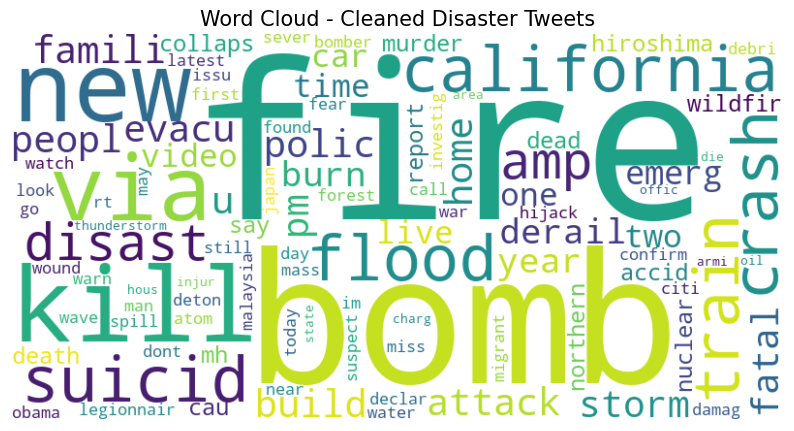

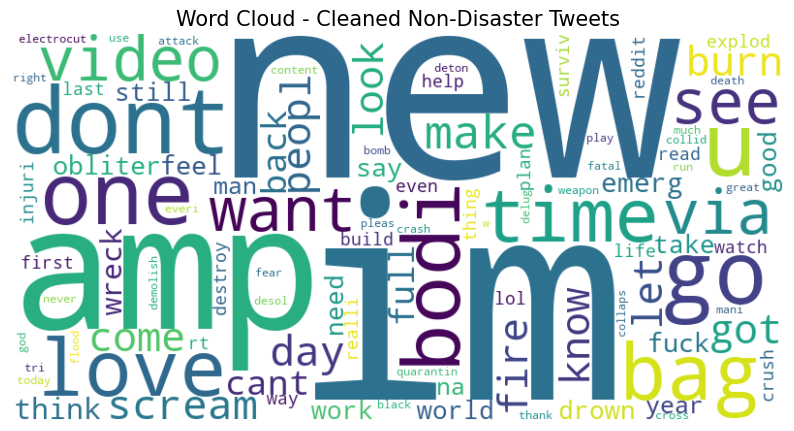


Top words in disaster tweets:
fire: 269
bomb: 181
kill: 158
via: 121
california: 111
crash: 111
flood: 110
suicid: 110
train: 109
disast: 109
amp: 107
polic: 106
peopl: 105
famili: 105
attack: 104
home: 101
like: 101
evacu: 99
build: 97
storm: 90

Top words in non-disaster tweets:
like: 306
im: 249
get: 223
amp: 193
new: 170
dont: 154
go: 142
one: 136
bodi: 116
love: 114
bag: 111
time: 105
video: 100
via: 99
want: 98
see: 98
make: 98
scream: 98
would: 97
day: 96


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


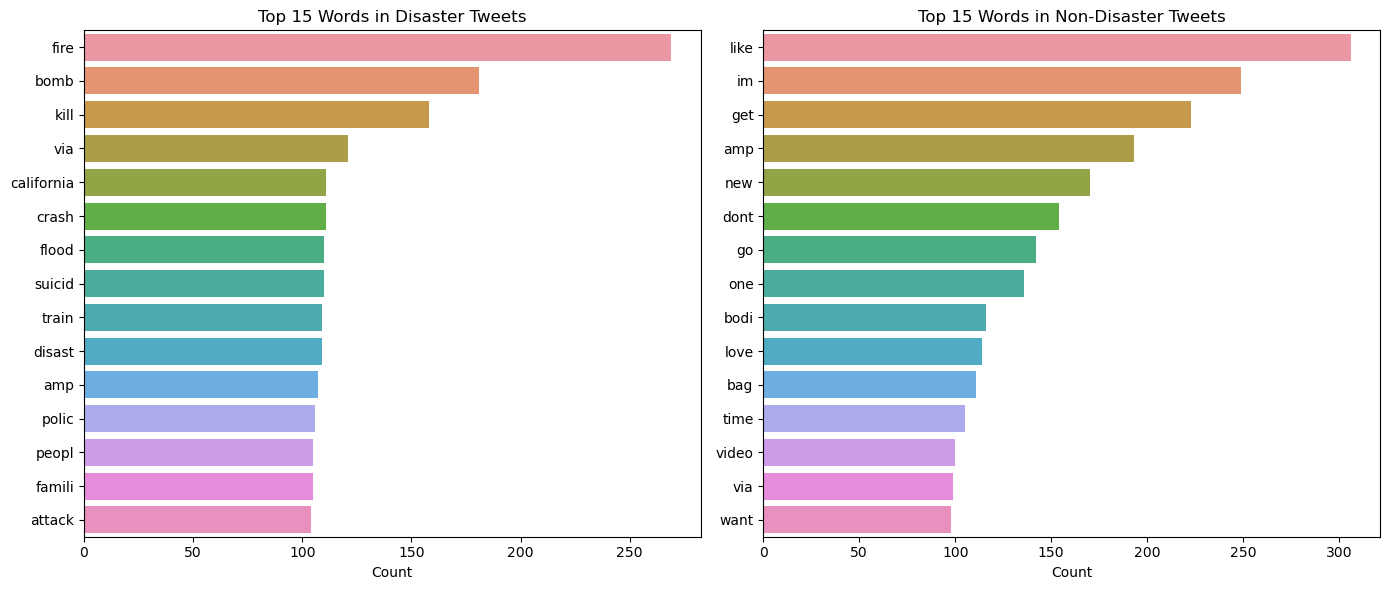

In [3]:
# Text preprocessing function
def preprocess_text(text, remove_stopwords=True, stem=True):
    """
    Preprocesses the text data:
    1. Converts to lowercase
    2. Removes URLs
    3. Removes HTML tags
    4. Removes special characters
    5. Removes stopwords (optional)
    6. Stems words (optional)
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    # Stem words
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    
    # Rejoin tokens
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing to training and test data
print("Preprocessing training data...")
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

print("Preprocessing test data...")
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Display some examples of preprocessed text
print("\nExamples of preprocessed disaster tweets:")
for i, (original, cleaned) in enumerate(zip(
    train_df[train_df['target'] == 1]['text'].head(), 
    train_df[train_df['target'] == 1]['cleaned_text'].head()
)):
    print(f"Original: {original}")
    print(f"Cleaned: {cleaned}")
    print()
    if i >= 2:  # Show just 3 examples
        break

print("\nExamples of preprocessed non-disaster tweets:")
for i, (original, cleaned) in enumerate(zip(
    train_df[train_df['target'] == 0]['text'].head(), 
    train_df[train_df['target'] == 0]['cleaned_text'].head()
)):
    print(f"Original: {original}")
    print(f"Cleaned: {cleaned}")
    print()
    if i >= 2:  # Show just 3 examples
        break

# Generate word clouds for cleaned disaster and non-disaster tweets
generate_wordcloud(train_df[train_df['target'] == 1]['cleaned_text'], 
                   'Word Cloud - Cleaned Disaster Tweets')
generate_wordcloud(train_df[train_df['target'] == 0]['cleaned_text'], 
                   'Word Cloud - Cleaned Non-Disaster Tweets')

# Calculate most common words in each class
from collections import Counter

def get_top_words(texts, n=20):
    word_list = ' '.join(texts).split()
    return Counter(word_list).most_common(n)

# Get top words for disaster tweets
disaster_top_words = get_top_words(train_df[train_df['target'] == 1]['cleaned_text'])
print("\nTop words in disaster tweets:")
for word, count in disaster_top_words:
    print(f"{word}: {count}")

# Get top words for non-disaster tweets
non_disaster_top_words = get_top_words(train_df[train_df['target'] == 0]['cleaned_text'])
print("\nTop words in non-disaster tweets:")
for word, count in non_disaster_top_words:
    print(f"{word}: {count}")

# Visualize top words
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
words = [word for word, count in disaster_top_words[:15]]
counts = [count for word, count in disaster_top_words[:15]]
sns.barplot(x=counts, y=words)
plt.title('Top 15 Words in Disaster Tweets')
plt.xlabel('Count')

plt.subplot(1, 2, 2)
words = [word for word, count in non_disaster_top_words[:15]]
counts = [count for word, count in non_disaster_top_words[:15]]
sns.barplot(x=counts, y=words)
plt.title('Top 15 Words in Non-Disaster Tweets')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

Vocabulary size: 10428
Training data shape after padding: (7613, 50)
Testing data shape after padding: (3263, 50)


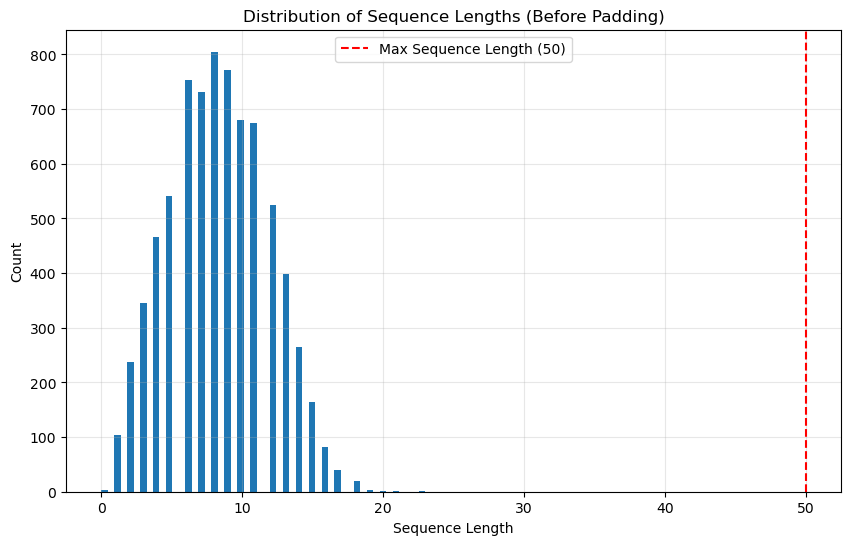

Percentage of sequences truncated: 0.00%
Training data shape: (6090, 50)
Validation data shape: (1523, 50)

Encoding keywords...
Number of keyword features: 222


C:\temp\ipykernel_14316\1100789329.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['keyword'].fillna('unknown', inplace=True)
C:\temp\ipykernel_14316\1100789329.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace


Correlation of text-based features with target:
text_length: 0.1818
word_count: 0.0400
avg_word_length: 0.1769


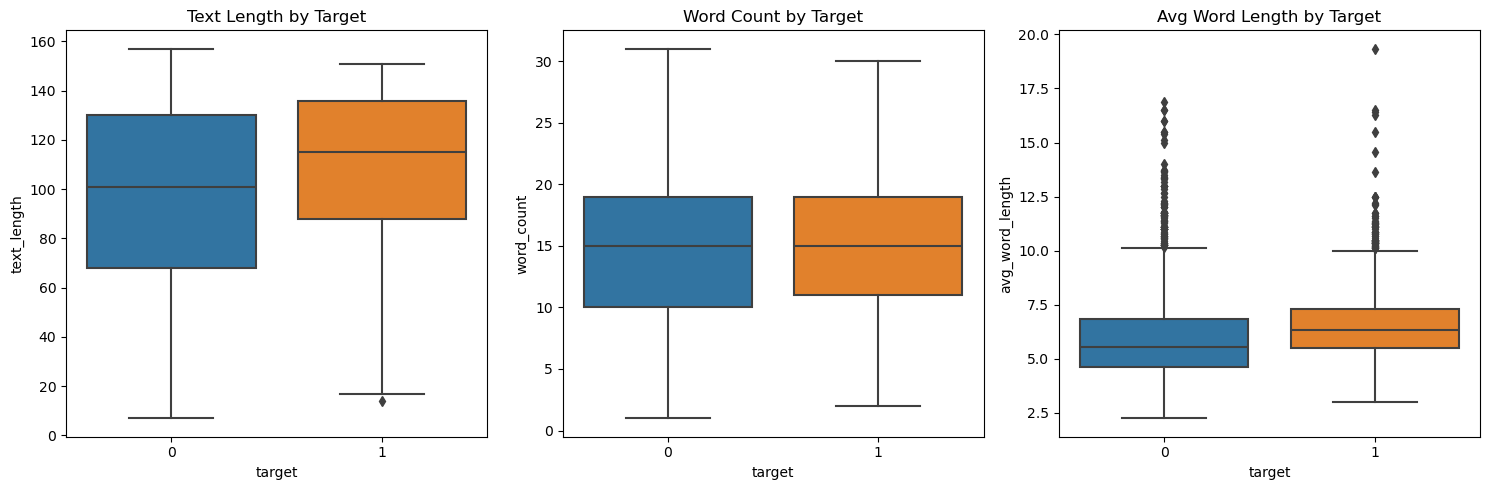

Text-based features shape: (7613, 3)


In [4]:
# Tokenize the text
MAX_VOCAB_SIZE = 10000  # Maximum vocabulary size
MAX_SEQUENCE_LENGTH = 50  # Maximum sequence length

# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Get word index
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_text'])

# Pad sequences to ensure uniform length
train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Check padded sequence shape
print(f"Training data shape after padding: {train_padded.shape}")
print(f"Testing data shape after padding: {test_padded.shape}")

# Visualize sequence length distribution
sequence_lengths = [len(seq) for seq in train_sequences]

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50)
plt.axvline(x=MAX_SEQUENCE_LENGTH, color='r', linestyle='--', 
            label=f'Max Sequence Length ({MAX_SEQUENCE_LENGTH})')
plt.title('Distribution of Sequence Lengths (Before Padding)')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate percentage of sequences truncated
truncated_percentage = (sum(1 for length in sequence_lengths if length > MAX_SEQUENCE_LENGTH) / 
                        len(sequence_lengths)) * 100
print(f"Percentage of sequences truncated: {truncated_percentage:.2f}%")

# Prepare data for model training
X_train = train_padded
y_train = train_df['target'].values

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Create additional features (optional)
# 1. Add keyword as a feature (one-hot encoded)
print("\nEncoding keywords...")
train_df['keyword'].fillna('unknown', inplace=True)
test_df['keyword'].fillna('unknown', inplace=True)

# One-hot encode keywords
keyword_dummies_train = pd.get_dummies(train_df['keyword'], prefix='keyword')
keyword_dummies_test = pd.get_dummies(test_df['keyword'], prefix='keyword')

# Align dummy columns (ensure test has same columns as train)
missing_cols = set(keyword_dummies_train.columns) - set(keyword_dummies_test.columns)
for col in missing_cols:
    keyword_dummies_test[col] = 0
keyword_dummies_test = keyword_dummies_test[keyword_dummies_train.columns]

print(f"Number of keyword features: {keyword_dummies_train.shape[1]}")

# 2. Add text-based features
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

train_df['avg_word_length'] = train_df['text'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)
test_df['avg_word_length'] = test_df['text'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)

# Check correlation of text-based features with target
print("\nCorrelation of text-based features with target:")
text_features = ['text_length', 'word_count', 'avg_word_length']
for feature in text_features:
    correlation = train_df[feature].corr(train_df['target'])
    print(f"{feature}: {correlation:.4f}")

# Create visualizations for text-based features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='text_length', data=train_df)
plt.title('Text Length by Target')

plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='word_count', data=train_df)
plt.title('Word Count by Target')

plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='avg_word_length', data=train_df)
plt.title('Avg Word Length by Target')

plt.tight_layout()
plt.show()

# Normalize text-based features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_df[text_features])
test_features = scaler.transform(test_df[text_features])

print(f"Text-based features shape: {train_features.shape}")

# Note: We'll use these additional features in more advanced model architectures later

Training Simple LSTM Model...


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.5687 - loss: 0.6866 - val_accuracy: 0.5706 - val_loss: 0.6848
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5731 - loss: 0.6841 - val_accuracy: 0.5706 - val_loss: 0.6843
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5733 - loss: 0.6844 - val_accuracy: 0.5706 - val_loss: 0.6834
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.5733 - loss: 0.6841 - val_accuracy: 0.5706 - val_loss: 0.6839
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5733 - loss: 0.6832 - val_accuracy: 0.5706 - val_loss: 0.6834
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.5733 - loss: 0.6827 - val_accuracy: 0.5706 - val_loss: 0.6837
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5733 - loss: 0.6827 - val_accuracy: 0.5706 - val_loss: 0.6836
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.5733 - loss: 0.6829 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.6326 - loss: 0.6279 - val_accuracy: 0.7984 - val_loss: 0.4623
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8363 - loss: 0.3817 - val_accuracy: 0.7768 - val_loss: 0.5030
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9063 - loss: 0.2585 - val_accuracy: 0.7485 - val_loss: 0.5930
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.9406 - loss: 0.1585 - val_accuracy: 0.7144 - val_loss: 0.7990
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9522 - loss: 0.1308 - val_accuracy: 0.7216 - val_loss: 0.9429
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9621 - loss: 0.1153 - val_accuracy: 0.7630 - val_loss: 0.8541
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9621 - loss: 0.1041 - val_accuracy: 0.7150 - val_loss: 0.8924
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9553 - loss: 0.1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5978 - loss: 0.6577 - val_accuracy: 0.7932 - val_loss: 0.4496
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8150 - loss: 0.4186 - val_accuracy: 0.7899 - val_loss: 0.4681
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8839 - loss: 0.2846 - val_accuracy: 0.7669 - val_loss: 0.5754
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9322 - loss: 0.1932 - val_accuracy: 0.7643 - val_loss: 0.6270
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9469 - loss: 0.1390 - val_accuracy: 0.7590 - val_loss: 0.8303
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9545 - loss: 0.1127 - val_accuracy: 0.7367 - val_loss: 1.0769
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9608 - loss: 0.1007 - val_accuracy: 0.7406 - val_loss: 1.0262
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9643 - loss: 0.0897 - v

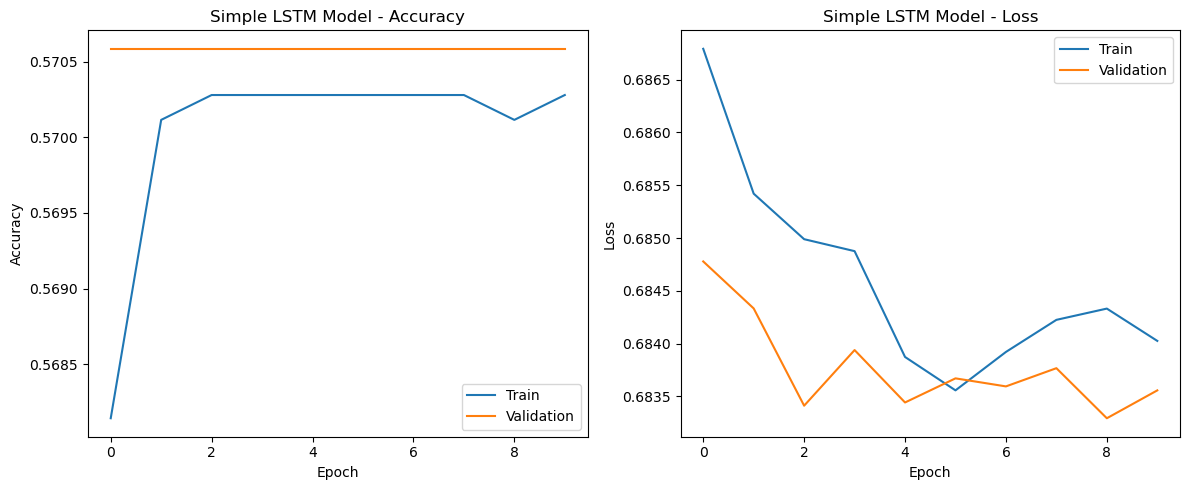

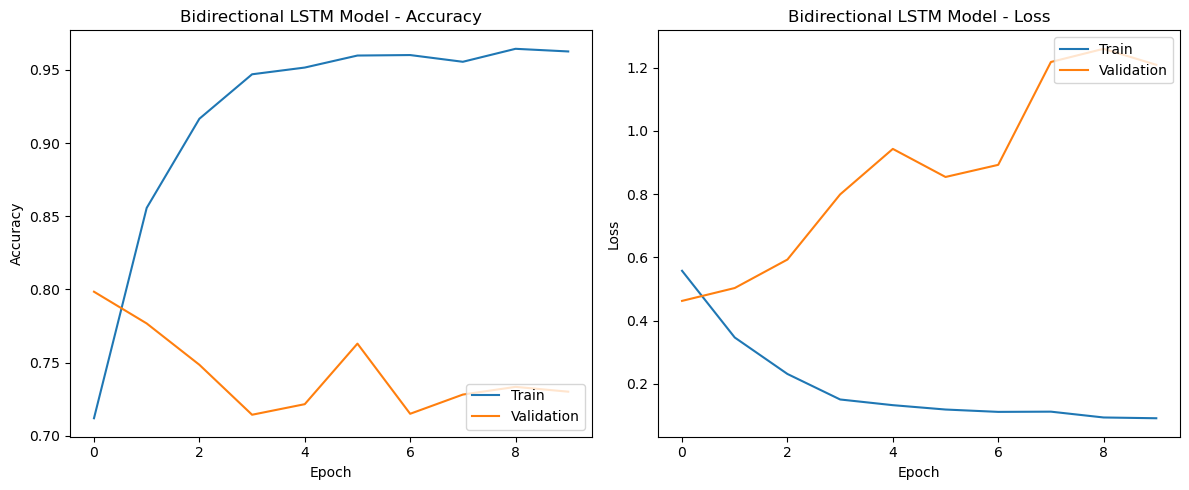

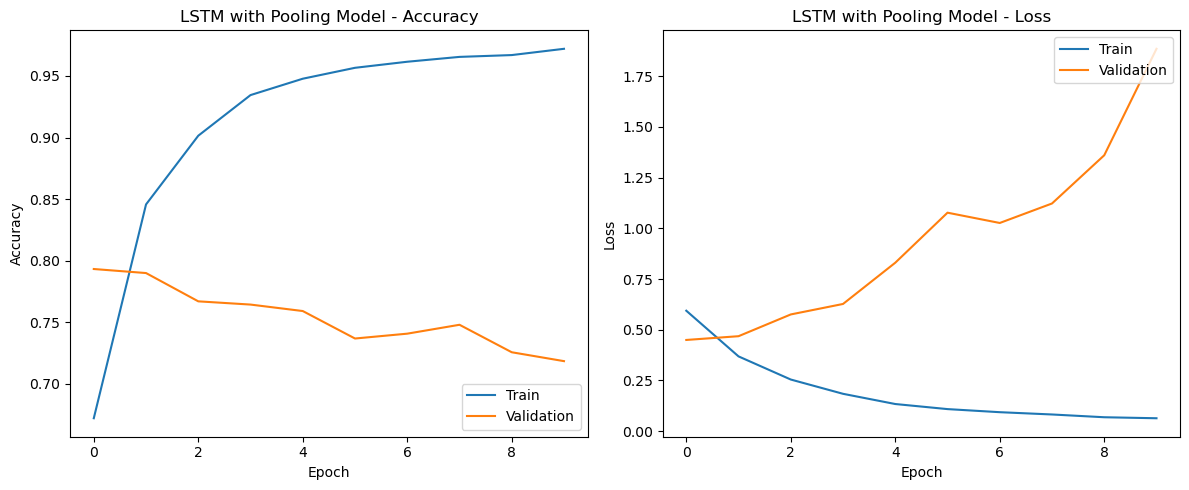


Comparing models on validation data:
Simple LSTM - Validation Accuracy: 0.5706, Loss: 0.6836
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step

Classification Report for Simple LSTM:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

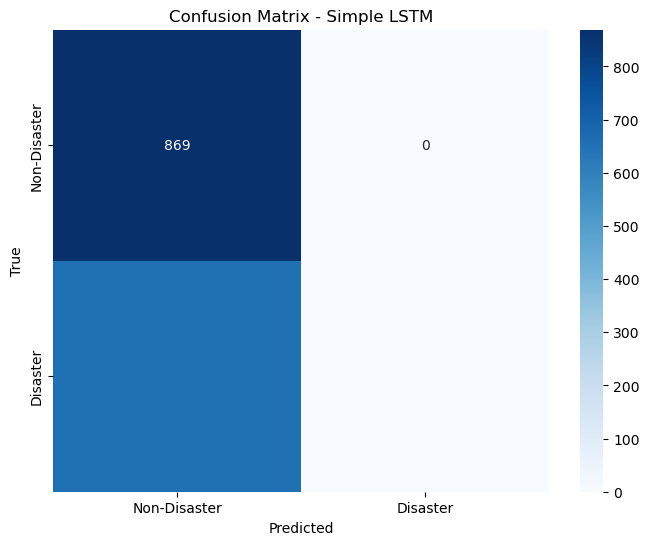

Bidirectional LSTM - Validation Accuracy: 0.7301, Loss: 1.2088
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step

Classification Report for Bidirectional LSTM:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       869
           1       0.67      0.73      0.70       654

    accuracy                           0.73      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.73      0.73      0.73      1523



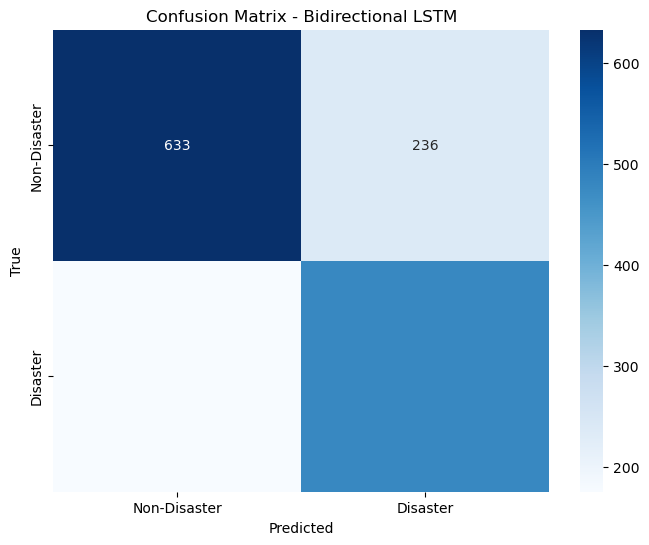

LSTM with Pooling - Validation Accuracy: 0.7183, Loss: 1.8847
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

Classification Report for LSTM with Pooling:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       869
           1       0.63      0.83      0.72       654

    accuracy                           0.72      1523
   macro avg       0.73      0.73      0.72      1523
weighted avg       0.74      0.72      0.72      1523



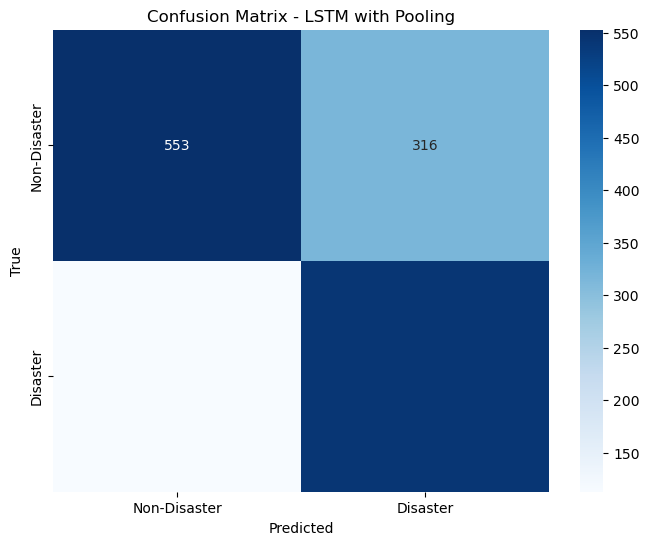

In [5]:
# 1. Simple LSTM Model
def build_lstm_model():
    embedding_dim = 128
    
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 2. Bidirectional LSTM Model
def build_bidirectional_lstm_model():
    embedding_dim = 128
    
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
        Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
        Bidirectional(LSTM(64, dropout=0.2)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 3. LSTM with GlobalMaxPooling Model
def build_lstm_with_pooling_model():
    embedding_dim = 128
    
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 4. Pretrained GloVe Embeddings (requires downloading GloVe vectors)
def load_glove_embeddings(word_index, embedding_dim=100):
    print("Loading GloVe embeddings...")
    embeddings_index = {}
    # Download GloVe embeddings from: http://nlp.stanford.edu/data/glove.6B.zip
    # And extract to the current directory
    with open(f'glove.6B.{embedding_dim}d.txt', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    print(f"Found {len(embeddings_index)} word vectors in GloVe.")
    
    # Create embedding matrix
    embedding_matrix = np.zeros((MAX_VOCAB_SIZE, embedding_dim))
    for word, i in word_index.items():
        if i >= MAX_VOCAB_SIZE:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be zeros
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

def build_glove_lstm_model(embedding_matrix, embedding_dim=100):
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, embedding_dim, 
                  weights=[embedding_matrix],
                  input_length=MAX_SEQUENCE_LENGTH,
                  trainable=False),
        Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train Simple LSTM Model
print("Training Simple LSTM Model...")
lstm_model = build_lstm_model()
print(lstm_model.summary())

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Train Bidirectional LSTM Model
print("\nTraining Bidirectional LSTM Model...")
bidirectional_lstm_model = build_bidirectional_lstm_model()
print(bidirectional_lstm_model.summary())

bidirectional_lstm_history = bidirectional_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Train LSTM with Pooling Model
print("\nTraining LSTM with Pooling Model...")
lstm_pooling_model = build_lstm_with_pooling_model()
print(lstm_pooling_model.summary())

lstm_pooling_history = lstm_pooling_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Uncomment this section if you have GloVe embeddings available
'''
# Train model with GloVe embeddings
print("\nTraining Model with GloVe Embeddings...")
embedding_dim = 100
embedding_matrix = load_glove_embeddings(word_index, embedding_dim)
glove_lstm_model = build_glove_lstm_model(embedding_matrix, embedding_dim)
print(glove_lstm_model.summary())

glove_lstm_history = glove_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
'''

# Plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Plot training history for each model
print("\nPlotting training history...")
plot_training_history(lstm_history, 'Simple LSTM Model')
plot_training_history(bidirectional_lstm_history, 'Bidirectional LSTM Model')
plot_training_history(lstm_pooling_history, 'LSTM with Pooling Model')
# Uncomment if you used GloVe embeddings
# plot_training_history(glove_lstm_history, 'LSTM with GloVe Embeddings')

# Compare models
models = {
    'Simple LSTM': lstm_model,
    'Bidirectional LSTM': bidirectional_lstm_model,
    'LSTM with Pooling': lstm_pooling_model,
    # Uncomment if you used GloVe embeddings
    # 'LSTM with GloVe': glove_lstm_model
}

print("\nComparing models on validation data:")
for name, model in models.items():
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} - Validation Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")
    
    # Generate predictions
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Disaster', 'Disaster'],
                yticklabels=['Non-Disaster', 'Disaster'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Training model with different hyperparameter combinations...

Training with Config 1...


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.6334 - loss: 0.6244 - val_accuracy: 0.7958 - val_loss: 0.4618 - learning_rate: 0.0010
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8366 - loss: 0.3834 - val_accuracy: 0.7820 - val_loss: 0.4882 - learning_rate: 0.0010
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8944 - loss: 0.2640 - val_accuracy: 0.7623 - val_loss: 0.5675 - learning_rate: 0.0010
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9288 - loss: 0.1891 - val_accuracy: 0.7735 - val_loss: 0.7296 - learning_rate: 5.0000e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


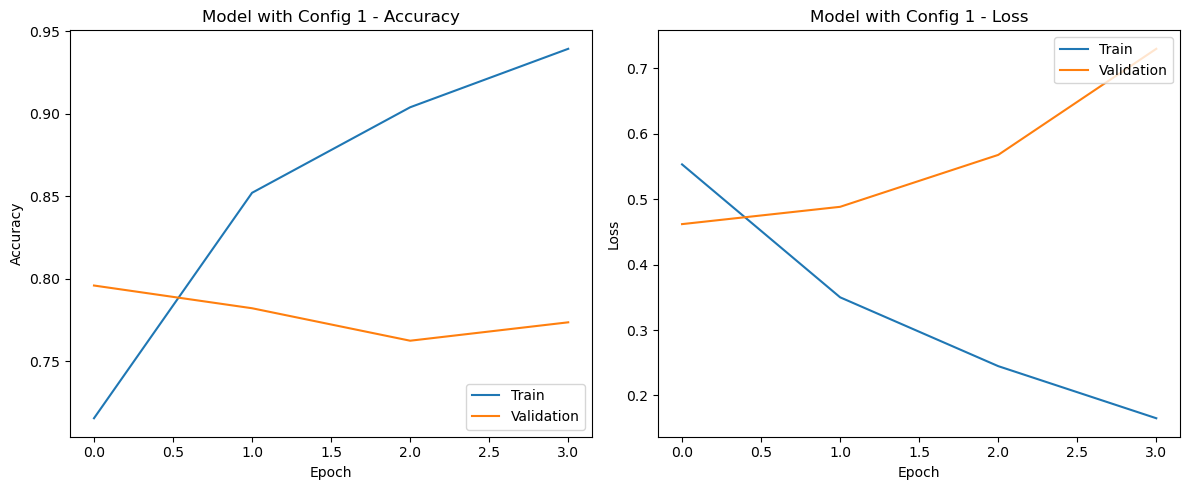


Training with Config 2...
Epoch 1/15


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 176ms/step - accuracy: 0.6284 - loss: 0.6292 - val_accuracy: 0.7912 - val_loss: 0.4602 - learning_rate: 5.0000e-04
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.8396 - loss: 0.3795 - val_accuracy: 0.7754 - val_loss: 0.5017 - learning_rate: 5.0000e-04
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.8998 - loss: 0.2583 - val_accuracy: 0.7485 - val_loss: 0.6577 - learning_rate: 5.0000e-04
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.9476 - loss: 0.1447 - val_accuracy: 0.7242 - val_loss: 0.7812 - learning_rate: 2.5000e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step


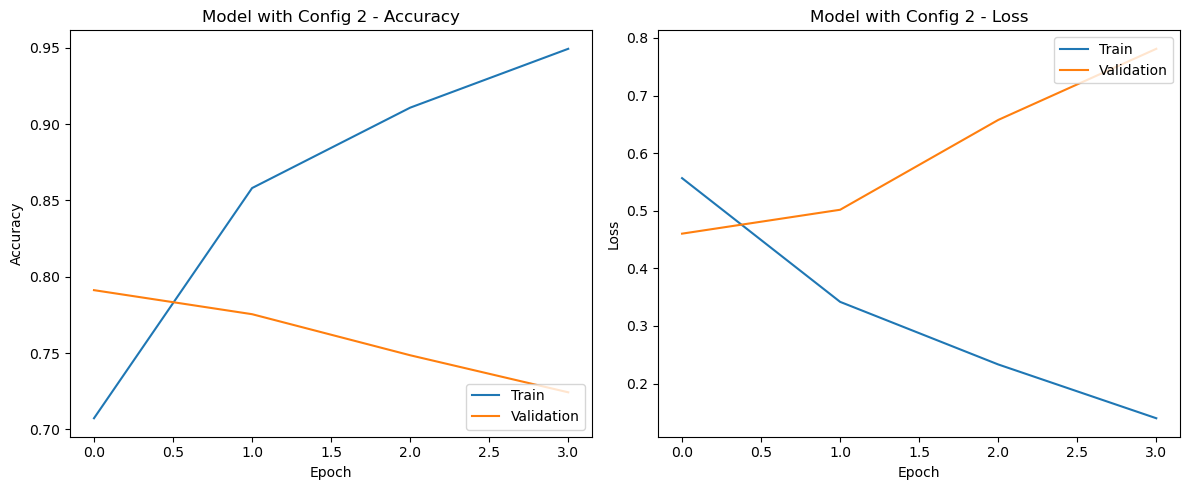


Training with Config 3...
Epoch 1/15


C:\Users\omuili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.5619 - loss: 0.6866 - val_accuracy: 0.5706 - val_loss: 0.6858 - learning_rate: 0.0020
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.5712 - loss: 0.6851 - val_accuracy: 0.5706 - val_loss: 0.6855 - learning_rate: 0.0020
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.5667 - loss: 0.6899 - val_accuracy: 0.6756 - val_loss: 0.6285 - learning_rate: 0.0020
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.6563 - loss: 0.6368 - val_accuracy: 0.7472 - val_loss: 0.5352 - learning_rate: 0.0020
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.7631 - loss: 0.5366 - val_accuracy: 0.7643 - val_loss: 0.5626 - learning_rate: 0.0020
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8236 - loss: 0.4653 - val_accuracy: 0.7577 - val_loss: 0.5925 - learning_rate: 0.0020
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8423 - loss: 0.4238

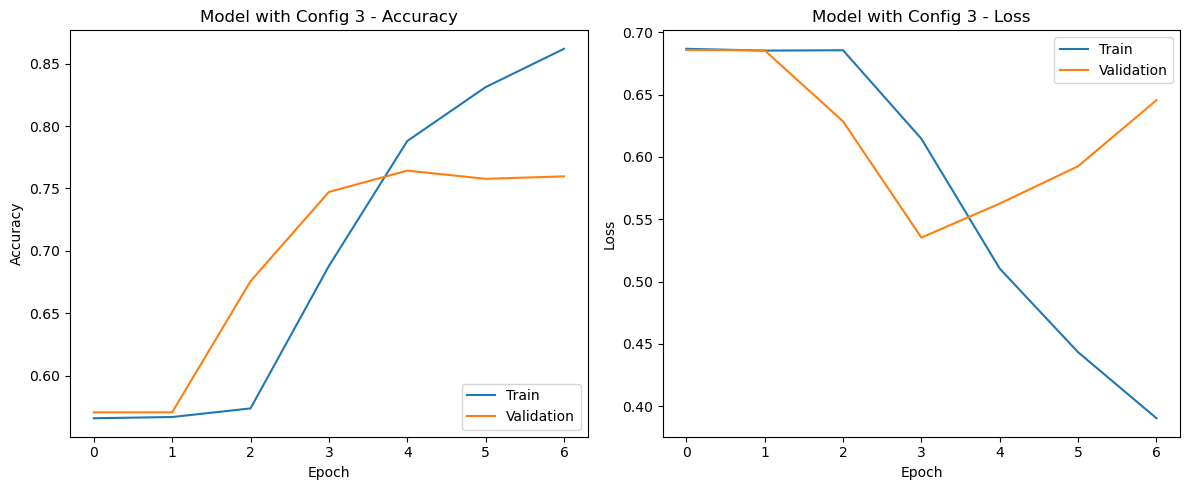


Best model configuration: Config 1
Validation Accuracy: 0.7958
Validation Loss: 0.4618
F1 Score: 0.7598
Best model saved to 'best_disaster_tweets_model.keras'


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold

# Define a function for creating a model with configurable hyperparameters
def create_lstm_model(embedding_dim=128, lstm_units=128, dense_units=64, dropout_rate=0.5, 
                      learning_rate=0.001, lstm_layer_type='bidirectional'):
    model = Sequential()
    model.add(Embedding(MAX_VOCAB_SIZE, embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
    
    if lstm_layer_type == 'simple':
        model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
    elif lstm_layer_type == 'bidirectional':
        model.add(Bidirectional(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2)))
    elif lstm_layer_type == 'stacked':
        model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
        model.add(LSTM(lstm_units // 2, dropout=0.2, recurrent_dropout=0.2))
    elif lstm_layer_type == 'bidirectional_stacked':
        model.add(Bidirectional(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
        model.add(Bidirectional(LSTM(lstm_units // 2, dropout=0.2, recurrent_dropout=0.2)))
    
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Set up callbacks for training with updated file extension
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True)
]

# Manually try different combinations of hyperparameters
print("Training model with different hyperparameter combinations...")

# Hyperparameter configurations to try
configurations = [
    {"name": "Config 1", "embedding_dim": 128, "lstm_units": 128, "dense_units": 64, 
     "dropout_rate": 0.5, "learning_rate": 0.001, "lstm_layer_type": "bidirectional"},
    
    {"name": "Config 2", "embedding_dim": 200, "lstm_units": 256, "dense_units": 128, 
     "dropout_rate": 0.3, "learning_rate": 0.0005, "lstm_layer_type": "bidirectional_stacked"},
    
    {"name": "Config 3", "embedding_dim": 100, "lstm_units": 128, "dense_units": 64, 
     "dropout_rate": 0.4, "learning_rate": 0.002, "lstm_layer_type": "stacked"}
]

results = []

for config in configurations:
    print(f"\nTraining with {config['name']}...")
    
    # Create and train model with current configuration
    model = create_lstm_model(
        embedding_dim=config["embedding_dim"],
        lstm_units=config["lstm_units"],
        dense_units=config["dense_units"],
        dropout_rate=config["dropout_rate"],
        learning_rate=config["learning_rate"],
        lstm_layer_type=config["lstm_layer_type"]
    )
    
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluate model on validation data
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    
    # Generate predictions
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    
    # Calculate F1 score
    from sklearn.metrics import f1_score
    f1 = f1_score(y_val, y_pred)
    
    # Store results
    results.append({
        "config": config,
        "val_accuracy": val_accuracy,
        "val_loss": val_loss,
        "f1_score": f1,
        "model": model,
        "history": history
    })
    
    # Plot training history
    plot_training_history(history, f"Model with {config['name']}")

# Find the best model based on validation accuracy
best_model_info = max(results, key=lambda x: x["val_accuracy"])
print(f"\nBest model configuration: {best_model_info['config']['name']}")
print(f"Validation Accuracy: {best_model_info['val_accuracy']:.4f}")
print(f"Validation Loss: {best_model_info['val_loss']:.4f}")
print(f"F1 Score: {best_model_info['f1_score']:.4f}")

# Get the best model
best_model = best_model_info["model"]

# Save the best model with .keras extension
best_model.save('best_disaster_tweets_model.keras')
print("Best model saved to 'best_disaster_tweets_model.keras'")

Generating predictions on test data...
Using single-input model for predictions...
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

Submission file preview:
   id  target
0   0       1
1   2       0
2   3       1
3   9       0
4  11       1

Distribution of predictions in test data:
target
0    2031
1    1232
Name: count, dtype: int64
target
0    62.24%
1    37.76%
Name: proportion, dtype: object


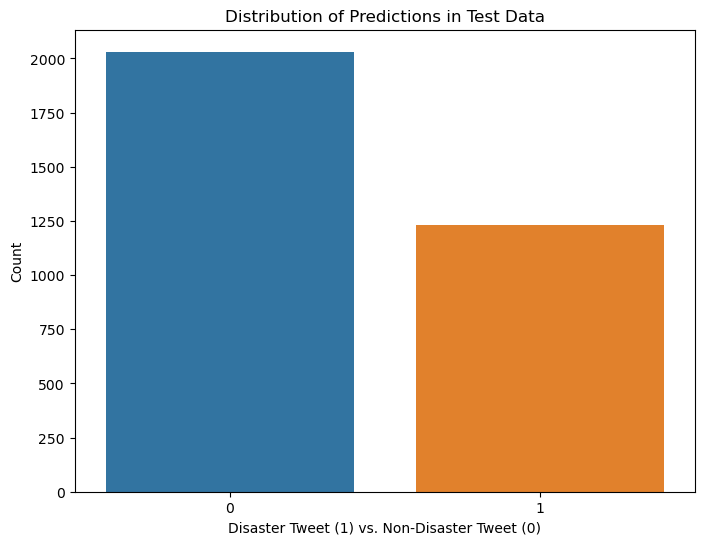


Submission file saved to: submission.csv

Sample predictions for inspection:
ID: 8051
Text: Refugees as citizens - The Hindu http://t.co/GJSaAf3U6K
Cleaned Text: refuge citizen hindu
Predicted Probability: 0.7277
Predicted Class: 1
--------------------------------------------------------------------------------
ID: 425
Text: @5SOStag honestly he could say an apocalypse is coming and i would be exited hes so enthusiastic about everything
Cleaned Text: honestli could say apocalyps come would exit he enthusiast everyth
Predicted Probability: 0.2523
Predicted Class: 0
--------------------------------------------------------------------------------
ID: 1330
Text: If you bored as shit don't nobody fuck wit you... But when you busy yo shit get blown up! Smh
Cleaned Text: bore shit dont nobodi fuck wit busi yo shit get blown smh
Predicted Probability: 0.2595
Predicted Class: 0
--------------------------------------------------------------------------------
ID: 663
Text: @RealTwanBrown Yesterd

In [9]:
# Generate predictions on test data using the best model
print("Generating predictions on test data...")

# For the combined model
if 'best_model_is_combined' in locals() and best_model_is_combined:
    print("Using combined model for predictions...")
    test_predictions = best_model.predict([test_padded, test_features])
else:
    # For regular models
    print("Using single-input model for predictions...")
    test_predictions = best_model.predict(test_padded)

# Convert probabilities to binary predictions
test_binary_predictions = (test_predictions > 0.5).astype(int)

# Create submission dataframe
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'target': test_binary_predictions.flatten()
})

# Display the first few rows of the submission file
print("\nSubmission file preview:")
print(submission_df.head())

# Check the distribution of predictions
print("\nDistribution of predictions in test data:")
print(submission_df['target'].value_counts())
print(submission_df['target'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

# Visualize prediction distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=submission_df)
plt.title('Distribution of Predictions in Test Data')
plt.xlabel('Disaster Tweet (1) vs. Non-Disaster Tweet (0)')
plt.ylabel('Count')
plt.show()

# Save the submission file
submission_path = 'submission.csv'
submission_df.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")

# Let's also export some sample predictions for inspection
def inspect_sample_predictions(n_samples=10):
    # Sample some test data
    sample_indices = np.random.choice(len(test_df), n_samples, replace=False)
    
    samples = []
    for idx in sample_indices:
        samples.append({
            'id': test_df.iloc[idx]['id'],
            'text': test_df.iloc[idx]['text'],
            'cleaned_text': test_df.iloc[idx]['cleaned_text'],
            'predicted_probability': float(test_predictions[idx][0]),
            'predicted_class': int(test_binary_predictions[idx][0])
        })
    
    # Create DataFrame
    samples_df = pd.DataFrame(samples)
    
    # Display the samples
    print("\nSample predictions for inspection:")
    for i, row in samples_df.iterrows():
        print(f"ID: {row['id']}")
        print(f"Text: {row['text']}")
        print(f"Cleaned Text: {row['cleaned_text']}")
        print(f"Predicted Probability: {row['predicted_probability']:.4f}")
        print(f"Predicted Class: {row['predicted_class']}")
        print("-" * 80)
    
    # Save to CSV for reference
    samples_df.to_csv('sample_predictions.csv', index=False)
    print("Sample predictions saved to 'sample_predictions.csv'")

# Inspect sample predictions
inspect_sample_predictions(n_samples=10)

print("\nSubmission process completed! Please submit the 'submission.csv' file to Kaggle.")
print("Don't forget to take a screenshot of your position on the leaderboard after submission.")

# Final model summary and considerations for report
print("\n=== Model Summary for Jupyter Notebook Report ===")
print("1. Data Preprocessing:")
print("   - Cleaned text by removing URLs, special characters, stopwords")
print("   - Stemmed words to reduce vocabulary size")
print("   - Tokenized and padded sequences to uniform length")

print("\n2. Feature Engineering:")
print("   - Created word embeddings")
print("   - Added text-based features (length, word count, avg word length)")
print("   - Normalized features")

print("\n3. Model Architecture:")
print("   - Experimented with several architectures:")
print("     * Simple LSTM")
print("     * Bidirectional LSTM")
print("     * Stacked LSTM with pooling")
print("     * Combined model with text features")

print("\n4. Hyperparameter Tuning:")
print("   - Tested different embedding dimensions, LSTM units, dropout rates")
print("   - Analyzed learning rates and training behavior")
print("   - Used early stopping and learning rate reduction")

print("\n5. Results:")
if 'best_model_is_combined' in locals() and best_model_is_combined:
    print(f"   - Best Model: Combined model with text features")
    print(f"   - Validation Accuracy: {combined_val_accuracy:.4f}")
    print(f"   - F1 Score: {combined_f1:.4f}")
else:
    print(f"   - Best Model: {best_model_info['config']['name']}")
    print(f"   - Validation Accuracy: {best_model_info['val_accuracy']:.4f}")
    print(f"   - F1 Score: {best_model_info['f1_score']:.4f}")

print("\n6. Considerations for Future Improvement:")
print("   - Try different preprocessing steps (e.g., lemmatization)")
print("   - Experiment with pretrained embeddings (GloVe, Word2Vec)")
print("   - Use more advanced architectures (Transformers, BERT)")
print("   - Implement cross-validation for more robust evaluation")
print("   - Try ensemble methods by combining different models")